<a href="https://colab.research.google.com/github/subramanya4shenoy/MachineLearningNbs/blob/main/MachineLearningNbs/LR_3rd_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this challenge, you will be predicting a full year worth of sales for various fictitious learning modules from
different fictitious Kaggle-branded stores in different (real!) countries.
 This dataset is completely synthetic, but contains many effects you see in real-world data,
 e.g., weekend and holiday effect, seasonality, etc. You are given the task of predicting sales during for year 2022.

In [1]:
"""
Basic setup for integrating Kaggle
Make sure the kaggle.json file is available and uploaded in session
"""
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [2]:

"""
Path to the dataset from kaggle
"""
!kaggle competitions download -c playground-series-s3e19

  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 155MB/s]


In [3]:

"""
unzipping the files and removing the zip
"""
!unzip \*.zip && rm *.zip

Archive:  playground-series-s3e19.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
"""
Importing packages for reading data
"""
import pandas as pd

salesdf = pd.read_csv('train.csv', index_col='id', parse_dates=['date'])
testdf = pd.read_csv('test.csv')
submissiondf = pd.read_csv('sample_submission.csv')

In [5]:
def get_insights(df):
  print("\n\n===========dataframe==========================")
  print(df.head(3))
  print("\n================================================")

  print("\n\n===========dataframe size=====================")
  print(df.shape)
  print("\n================================================")

  print("\n\n===========dataframe column names=============")
  print(df.columns)
  print("\n================================================")

  print("\n\n===========dataframe Unique value=============")
  print(df.nunique())
  print("\n================================================")

  print("\n\n===========dataframe data types===============")
  print(df.info())
  print("\n================================================")

  print("\n\n===========dataframe descriptions=============")
  print(df.describe())
  print("\n================================================")
  print("==================================================")

In [6]:
"""
Understanding the data
"""
get_insights(salesdf)
# get_insights(testdf)
# get_insights(submissiondf)



===========dataframe==========================
         date    country         store  \
id                                       
0  2017-01-01  Argentina  Kaggle Learn   
1  2017-01-01  Argentina  Kaggle Learn   
2  2017-01-01  Argentina  Kaggle Learn   

                                           product  num_sold  
id                                                            
0                Using LLMs to Improve Your Coding        63  
1                    Using LLMs to Train More LLMs        66  
2   Using LLMs to Win Friends and Influence People         9  



===========dataframe size=====================
(136950, 5)



===========dataframe column names=============
Index(['date', 'country', 'store', 'product', 'num_sold'], dtype='object')



===========dataframe Unique value=============
date        1826
country        5
store          3
product        5
num_sold    1028
dtype: int64



===========dataframe data types===============
<class 'pandas.core.frame.DataFrame'>
In

<Axes: xlabel='date', ylabel='num_sold'>

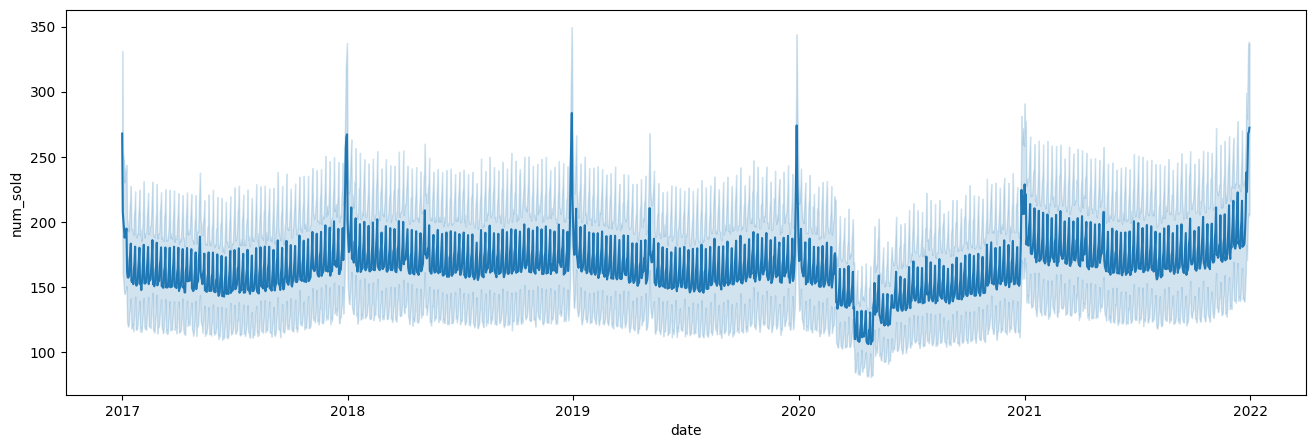

In [7]:
"""
Importing sns and matplotlib for visualization
"""
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
sns.lineplot(data=salesdf, x='date', y='num_sold')

In [8]:
"""
Want to remove the outliers which I am seeing visually.
I know this is deviated because of the covid, this will act as a outliers.
so I will plot the df from 2020 to 2021, and then remove the outlier date range gap.
"""

yearly_start_date = '2020-01-01'
yearly_end_date = '2020-12-31'
yearly_outlier_df = salesdf.loc[(salesdf.date > yearly_start_date) & (salesdf.date < yearly_end_date)]

half_yearly_start_date = '2020-01-01'
half_yearly_end_date = '2020-06-30'
half_yearly_outlier_df = salesdf.loc[(salesdf.date > half_yearly_start_date) & (salesdf.date < half_yearly_end_date)]


<Axes: xlabel='date', ylabel='num_sold'>

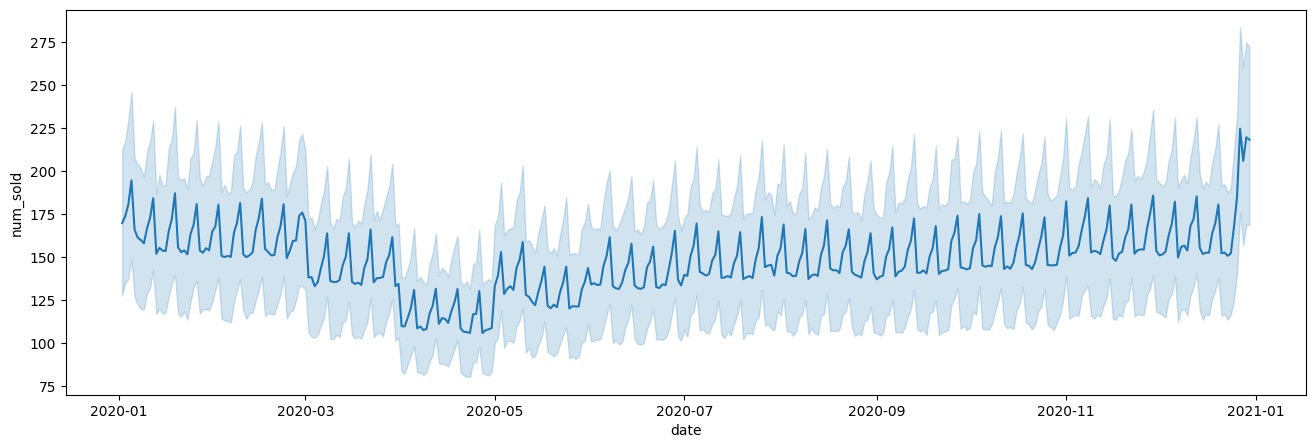

In [9]:
"""
Checking and narrowdowning the outliers
"""
plt.figure(figsize=(16,5))
sns.lineplot(data=yearly_outlier_df, x='date', y='num_sold')

In [32]:
"""
So instead of removeing the ouliers,
I will see what is the mean of 2017 - 2020
Then I will see what is the mean of 2020 - 2021
I check check the differenc and i will add the difference to correct the outliers
(as if covid never happened)

"""
import numpy as np

def correct_outliers(tempdf):

  df = tempdf.copy()

  #Adjusting month wise to fit the broken pattern for covid outliers
  mask2_start_date = '2020-03-01'
  mask2_end_date = '2020-04-01'
  mask2 = (df['date'] >= mask2_start_date) & (df['date'] <= mask2_end_date)

  mask3_start_date = '2020-04-01'
  mask3_end_date = '2020-05-01'
  mask3 = (df['date'] >= mask3_start_date) & (df['date'] <= mask3_end_date)

  mask4_start_date = '2020-06-02'
  mask4_end_date = '2020-07-01'
  mask4 = (df['date'] >= mask4_start_date) & (df['date'] <= mask4_end_date)

  mask5_start_date = '2020-05-02'
  mask5_end_date = '2020-06-01'
  mask5 = (df['date'] >= mask5_start_date) & (df['date'] <= mask5_end_date)

  df.loc[mask2, 'num_sold'] += 21
  df.loc[mask3, 'num_sold'] += 45
  df.loc[mask4, 'num_sold'] += 12
  df.loc[mask5, 'num_sold'] += 26
  return df

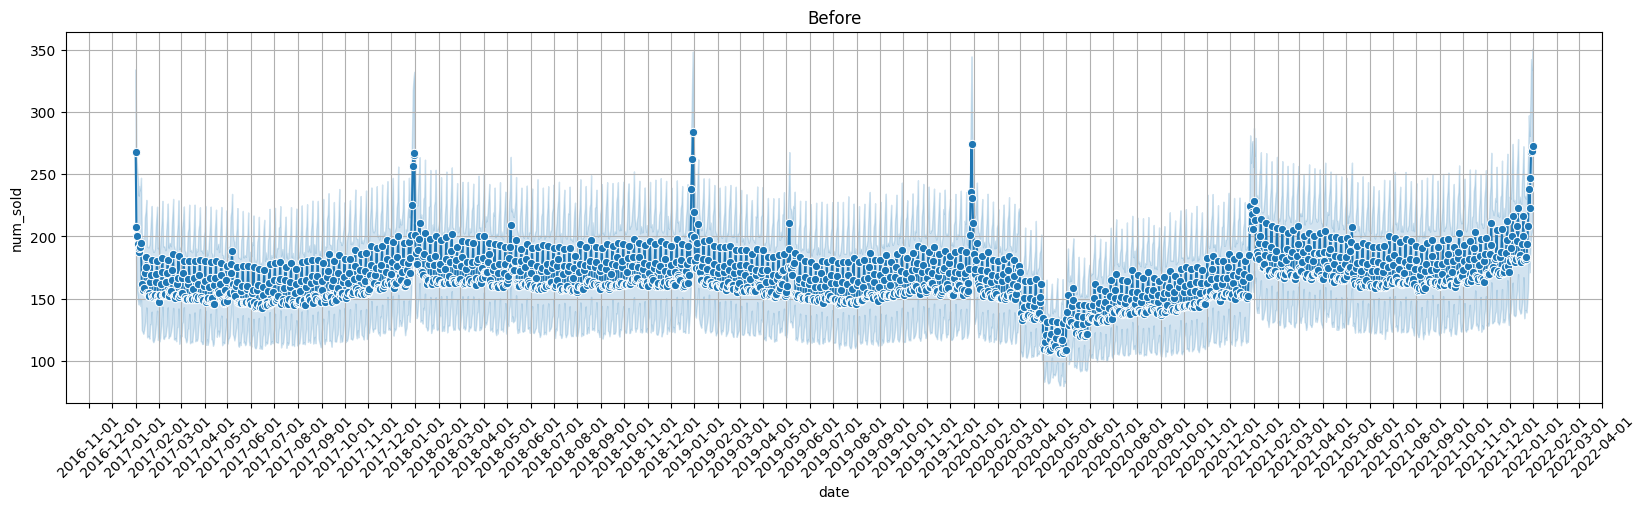

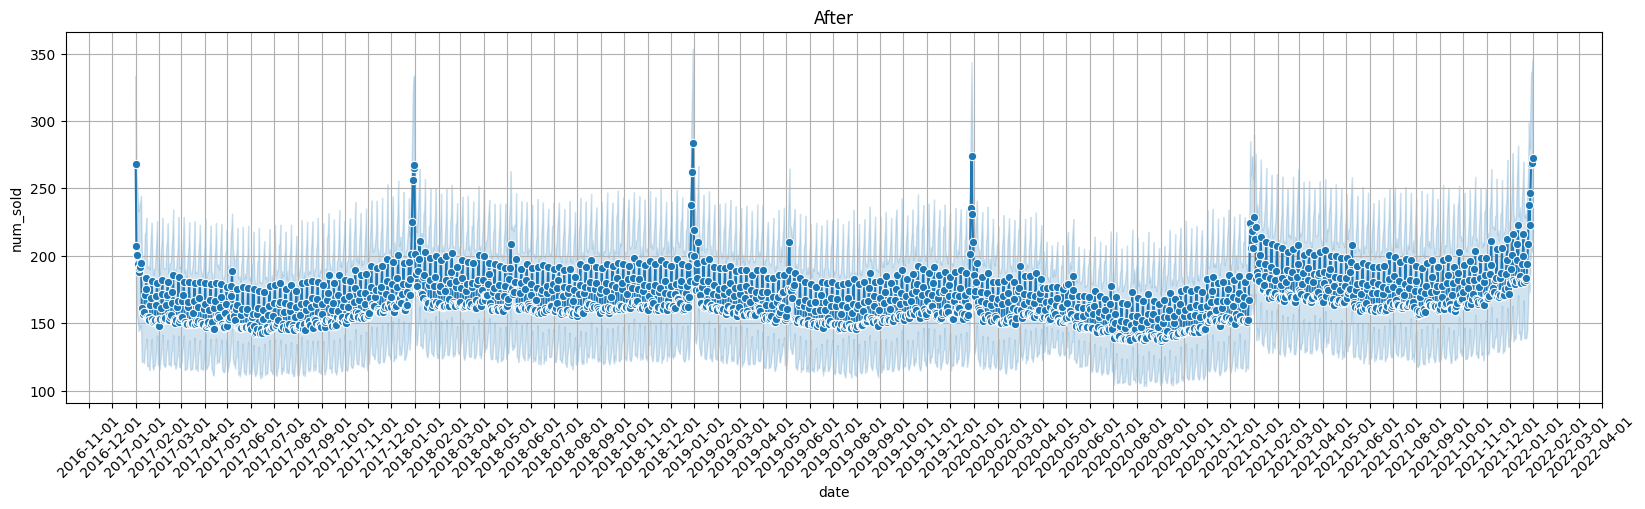

In [35]:
"""
Lets visualize the new corrected data
"""
import matplotlib.dates as mdates

tmp_salesdf = correct_outliers(salesdf);

plt.figure(figsize=(16,5))
plt.title('Before')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
sns.lineplot(data=salesdf, x='date', y='num_sold', marker='o')
plt.show()


plt.figure(figsize=(16,5))
plt.title("After")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
sns.lineplot(data=tmp_salesdf, x='date', y='num_sold', marker='o')
plt.show()

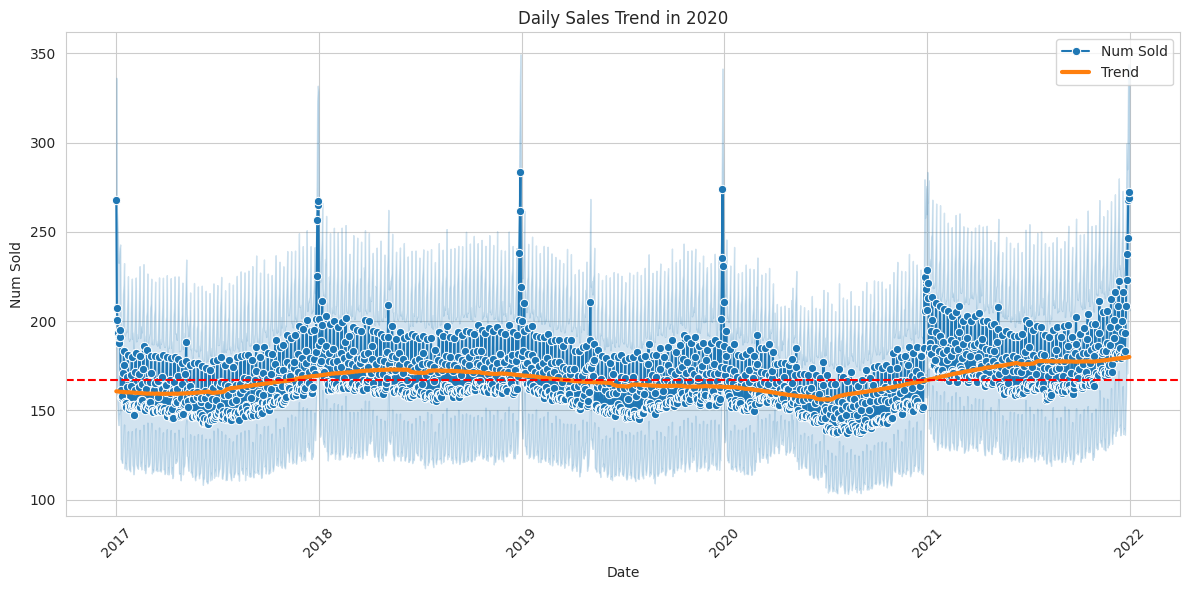

In [202]:
"""
This looks fine for checking the trend.
Using moving average plot to see the trend
"""
# Assuming 'date' is the column containing the datetime values and 'num_sold' is the column to be plotted
start_date = '2016-11-01'
end_date = '2022-01-01'

# Select the rows within the desired date range
mask = (tmp_salesdf['date'] >= start_date) & (tmp_salesdf['date'] <= end_date)

# Create a new DataFrame with only the relevant data for the plot
plot_data = tmp_salesdf.loc[mask, ['date', 'num_sold']]

# Calculate the trend using a rolling window
window_size = 25000  # Choosing an appropriate window size for your data
plot_data['trend'] = plot_data['num_sold'].rolling(window=window_size, center=True, min_periods=1).mean()

# Set Seaborn style (optional)
sns.set_style("whitegrid")

plot_data.head()

# Plot the data and trend line using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='num_sold', data=plot_data, marker='o', linestyle='-', label='Num Sold')
sns.lineplot(x='date', y='trend', data=plot_data, linewidth=3, linestyle='-', label='Trend')
plt.xlabel('Date')
plt.ylabel('Num Sold')
plt.title('Daily Sales Trend in 2020')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# To check the trend visually, you can add horizontal lines for important reference points, such as the overall mean.
overall_mean = tmp_salesdf['num_sold'].mean()
plt.axhline(overall_mean, color='red', linestyle='--', label='Overall Mean')

plt.show()

date
2017-01-01    160.334863
2017-01-02    160.268478
2017-01-03    160.205117
2017-01-04    160.151756
2017-01-05    160.109305
                 ...    
2021-12-27    178.916863
2021-12-28    178.986452
2021-12-29    179.081441
2021-12-30    179.170435
2021-12-31    179.250492
Name: num_sold, Length: 1826, dtype: float64


<Figure size 100x100 with 0 Axes>

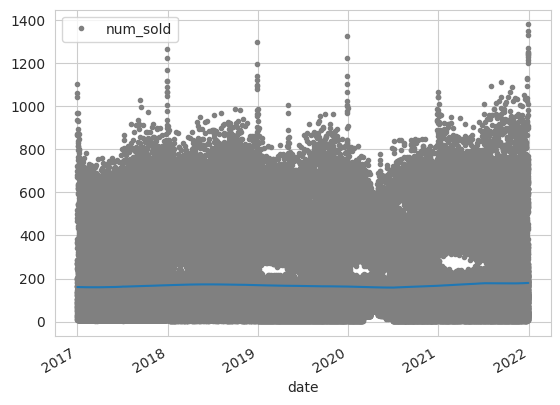

In [122]:
"""
Observation Seeing linear graph with straight line
The trend looks upward at the end.
"""

"""
Trying to plot it again with different way
"""
# # Group the data by 'date' and calculate the mean of 'num_sold'
# grouped_data = tmp_salesdf.groupby('date')['num_sold'].mean()


# moving_average = grouped_data.rolling(
#     window= 365,       # 365-day window
#     center=True,      # puts the average at the center of the window
#     min_periods=183,  # choose about half the window size
# ).mean()              # compute the mean (could also do median, std, min, max, ...)

# plt.figure(figsize=(1,1))
# print(moving_average)

# ax = tmp_salesdf.plot(style=".",
#                       color="0.5",
#                       x='date',
#                       y='num_sold')
# moving_average.plot(
#     ax=ax,
#     legend=False,
#     x='date',
#     y='num_sold',
# );
# plt.show()

In [333]:
"""
Trying deterministic process
- the line looks linear but we will try for some higher order aproaches
(y = mx + c) , so we are trying if this can be y = b0 + b1x1 + b2x2 ..
"""
from statsmodels.tsa.deterministic import DeterministicProcess

grouped_data = tmp_salesdf.groupby('date')['num_sold'].mean() #grouping the data datewise
mean_values_df = grouped_data.reset_index() # Convert the resulting Series to a DataFrame
mean_values_df.set_index('date', inplace=True) # Set the 'date' column as the index
print(mean_values_df.head)
pd.to_datetime(mean_values_df.index)

dp = DeterministicProcess(
    index = mean_values_df.index,
    constant= True,
    order=1,
    drop=True
)

X = dp.in_sample()
# Calculate the number of out-of-sample steps required
last_date_in_df = mean_values_df.index[-1]
forecast_end_date = pd.Timestamp('2023-12-31')  # Change this date to your desired end date
num_steps = (forecast_end_date - last_date_in_df).days + 1

# Make predictions for future dates using the deterministic process
dp_out_of_sample = dp.out_of_sample(steps=num_steps)
X.head()

<bound method NDFrame.head of               num_sold
date                  
2017-01-01  267.813333
2017-01-02  207.506667
2017-01-03  200.520000
2017-01-04  193.546667
2017-01-05  187.773333
...                ...
2021-12-27  222.986667
2021-12-28  246.760000
2021-12-29  268.133333
2021-12-30  268.746667
2021-12-31  272.293333

[1826 rows x 1 columns]>


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,const,trend
date,,
2017-01-01,1.0,1.0
2017-01-02,1.0,2.0
2017-01-03,1.0,3.0
2017-01-04,1.0,4.0
2017-01-05,1.0,5.0


In [334]:

"""
Creating our first model using deterministic proces
"""

from sklearn.linear_model import LinearRegression

y = mean_values_df["num_sold"]
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index = X.index)

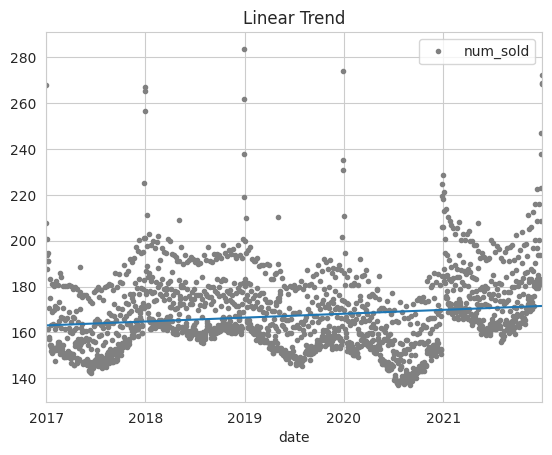

In [335]:
ax = mean_values_df.plot(style=".", color="0.5", title="Linear Trend")

_ = y_pred.plot(ax=ax, label="Trend")

In [349]:
# Lost in prediction - need to revisit
# X = dp.out_of_sample(steps=30)

# y_fore = pd.Series(model.predict(X), index=X.index)

# y_fore.head()

       const        trend
count  731.0   731.000000
mean     1.0  2192.000000
std      0.0   211.165812
min      1.0  1827.000000
25%      1.0  2009.500000
50%      1.0  2192.000000
75%      1.0  2374.500000
max      1.0  2557.000000
const    731
trend    731
dates    731
dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


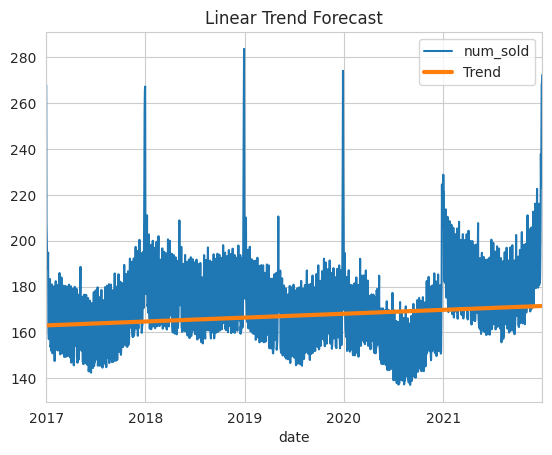

In [317]:
ax = mean_values_df.plot(title="Linear Trend Forecast")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
# ax = merged_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

In [358]:
"""
Checking seasonality with fourie
Seasonal Plots and Seasonal Indicators
"""

grouped_data = tmp_salesdf.groupby('date')['num_sold'].mean() #grouping the data datewise
df = grouped_data.reset_index() # Convert the resulting Series to a DataFrame
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True) # Set the 'date' column as the index
print(df)
#Wip

              num_sold
date                  
2017-01-01  267.813333
2017-01-02  207.506667
2017-01-03  200.520000
2017-01-04  193.546667
2017-01-05  187.773333
...                ...
2021-12-27  222.986667
2021-12-28  246.760000
2021-12-29  268.133333
2021-12-30  268.746667
2021-12-31  272.293333

[1826 rows x 1 columns]
